In [598]:
import numpy as np 
import pandas as pd
import torch 

# 1. Loading Data

In [599]:
X = pd.read_csv("./Xtrain_hgcGIrA.csv")
X.head()

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


In [600]:
y = pd.read_csv("./Ytrain_yL5OjS4.csv")
y.head()

,Unnamed: 0,p0q0
0,1,0.216
1,2,0.216
2,3,0.227
3,4,0.229
4,5,0.225


In [601]:
y = y.drop(['Unnamed: 0'], axis=1)

In [602]:
y.head()

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225


In [603]:
y.shape

(31119, 1)

In [604]:
any(X["hour"] == "11:00:00")

True

In [605]:
# shape of the data 
X.shape

(31119, 12)

In [606]:
X = pd.concat([X, y], axis=1)

In [607]:
X.head()

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091,0.216
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106,0.216
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111,0.227
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108,0.229
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096,0.225


# 2. Cleaning and Preparing data

In [608]:
C = True

for i in range(X["composition"].shape[0]):
    if not X["composition"][i] == 2:
        C = False
        break

C

False

In [609]:
D = True

for i in range(X["way"].shape[0]):
    if not X["way"][i] == 0:
        D = False
        break

D

True

In [610]:
X = X.drop( ["way"], axis=1)
X.head()

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091,0.216
1,2019-01-08,1,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106,0.216
2,2019-01-10,1,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111,0.227
3,2019-01-11,1,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108,0.229
4,2019-01-14,1,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096,0.225


In [611]:
X["train"].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54, 55,
        6,  7,  8,  9], dtype=int64)

In [612]:
X["station"].unique()

array(['AD', 'AI', 'AJ', 'AK', 'AM', 'AT', 'AW', 'AX', 'BB', 'BD', 'BE',
       'AE', 'AL', 'AO', 'AQ', 'BC', 'AB', 'AN', 'AS', 'BF', 'BG', 'BH',
       'AV', 'AF', 'AP', 'AZ', 'AA', 'AC', 'AG', 'AH', 'AR', 'AU', 'BA',
       'BI', 'BJ', 'AY'], dtype=object)

In [613]:
type(X['date'][1])

str

In [614]:
X.dtypes

date            object
train            int64
station         object
hour            object
composition      int64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
p0q0           float64
dtype: object

In [615]:
X['station'] = pd.factorize(X['station'])[0]
X["station"] = X['station'].astype(float)

In [616]:
X["station"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [617]:
X["train"] = X["train"].astype(float)
X["composition"] = X["composition"].astype(float)

In [618]:
X.dtypes

date            object
train          float64
station        float64
hour            object
composition    float64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
p0q0           float64
dtype: object

In [619]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.000000
train          0.000000
station        0.000000
composition    0.000000
p0q0           0.000000
p1q0           0.065940
p0q1           0.102895
hour           0.102960
p2q0           0.133198
p3q0           0.198721
p0q2           0.205630
p0q3           0.308236
dtype: float64

In [620]:
mean_by_train1 = X.groupby('train')['p1q0'].mean()
X['p1q0'] = X['p1q0'].fillna(X['train'].map(mean_by_train1))

mean_by_train2 = X.groupby('train')['p2q0'].mean()
X['p2q0'] = X['p2q0'].fillna(X['train'].map(mean_by_train2))

mean_by_train3 = X.groupby('train')['p3q0'].mean()
X['p3q0'] = X['p3q0'].fillna(X['train'].map(mean_by_train3))

mean_by_train4 = X.groupby('train')['p0q1'].mean()
X['p0q1'] = X['p0q1'].fillna(X['train'].map(mean_by_train4))

mean_by_train5 = X.groupby('train')['p0q2'].mean()
X['p0q2'] = X['p0q2'].fillna(X['train'].map(mean_by_train5))

mean_by_train6 = X.groupby('train')['p0q3'].mean()
X['p0q3'] = X['p0q3'].fillna(X['train'].map(mean_by_train6))

X = X.fillna( value = 0)


In [621]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.0
train          0.0
station        0.0
hour           0.0
composition    0.0
p1q0           0.0
p2q0           0.0
p3q0           0.0
p0q1           0.0
p0q2           0.0
p0q3           0.0
p0q0           0.0
dtype: float64

In [622]:
X

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1.0,0.0,06:00:00,2.0,0.127765,0.173479,0.175463,0.201,0.138,0.091000,0.216
1,2019-01-08,1.0,0.0,06:00:00,2.0,0.127765,0.173479,0.175463,0.204,0.152,0.106000,0.216
2,2019-01-10,1.0,0.0,06:00:00,2.0,0.127765,0.173479,0.175463,0.213,0.153,0.111000,0.227
3,2019-01-11,1.0,0.0,06:00:00,2.0,0.127765,0.173479,0.175463,0.213,0.152,0.108000,0.229
4,2019-01-14,1.0,0.0,06:00:00,2.0,0.127765,0.173479,0.175463,0.210,0.147,0.096000,0.225
...,...,...,...,...,...,...,...,...,...,...,...,...
31114,2019-05-13,9.0,10.0,08:00:00,2.0,0.152000,0.188600,0.157000,0.080,0.100,0.259469,0.111
31115,2019-05-14,9.0,10.0,08:00:00,2.0,0.153000,0.180400,0.191000,0.089,0.121,0.259469,0.143
31116,2019-05-15,9.0,10.0,08:00:00,2.0,0.166000,0.149000,0.168000,0.099,0.129,0.259469,0.139
31117,2019-03-21,9.0,10.0,08:00:00,2.0,0.182000,0.193000,0.162000,0.074,0.101,0.259469,0.117


# 3. Data cleaning 

In [623]:
# We check how much number 1 we have in the colomn "composition" 
(X["composition"].sum() - X["composition"].shape[0]*2)  

-11.0

In [624]:
# We can delete it now
X.drop(["composition"], axis=1)

,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1.0,0.0,06:00:00,0.127765,0.173479,0.175463,0.201,0.138,0.091000,0.216
1,2019-01-08,1.0,0.0,06:00:00,0.127765,0.173479,0.175463,0.204,0.152,0.106000,0.216
2,2019-01-10,1.0,0.0,06:00:00,0.127765,0.173479,0.175463,0.213,0.153,0.111000,0.227
3,2019-01-11,1.0,0.0,06:00:00,0.127765,0.173479,0.175463,0.213,0.152,0.108000,0.229
4,2019-01-14,1.0,0.0,06:00:00,0.127765,0.173479,0.175463,0.210,0.147,0.096000,0.225
...,...,...,...,...,...,...,...,...,...,...,...
31114,2019-05-13,9.0,10.0,08:00:00,0.152000,0.188600,0.157000,0.080,0.100,0.259469,0.111
31115,2019-05-14,9.0,10.0,08:00:00,0.153000,0.180400,0.191000,0.089,0.121,0.259469,0.143
31116,2019-05-15,9.0,10.0,08:00:00,0.166000,0.149000,0.168000,0.099,0.129,0.259469,0.139
31117,2019-03-21,9.0,10.0,08:00:00,0.182000,0.193000,0.162000,0.074,0.101,0.259469,0.117


In [625]:
import seaborn as sns

In [626]:
X.dtypes

date            object
train          float64
station        float64
hour            object
composition    float64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
p0q0           float64
dtype: object

In [627]:
X['hour'] = pd.to_datetime(X['hour'], format="%H:%M:%S", errors='coerce')
X['hour'] = X['hour'].dt.time
X['hour'] = X['hour'].apply(lambda x: x.hour + x.minute * 60 + x.second)


In [628]:
X["hour"].unique()

array([ 6.,  7., nan,  8.,  9., 11.])

In [629]:
X.dtypes

date            object
train          float64
station        float64
hour           float64
composition    float64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
p0q0           float64
dtype: object

In [630]:
import matplotlib.pyplot as plt

(array([7898., 7874., 5030., 3493., 3450., 2275.,  909.,  138.,   39.,
          13.]),
 array([0.    , 0.0934, 0.1868, 0.2802, 0.3736, 0.467 , 0.5604, 0.6538,
        0.7472, 0.8406, 0.934 ]),
 <BarContainer object of 10 artists>)

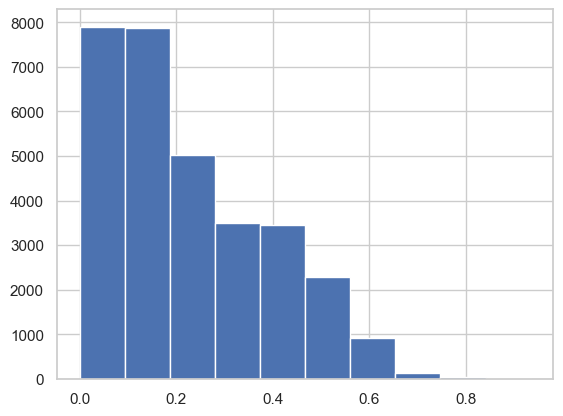

In [631]:
plt.hist(X["p1q0"])

<Axes: xlabel='hour', ylabel='p1q0'>

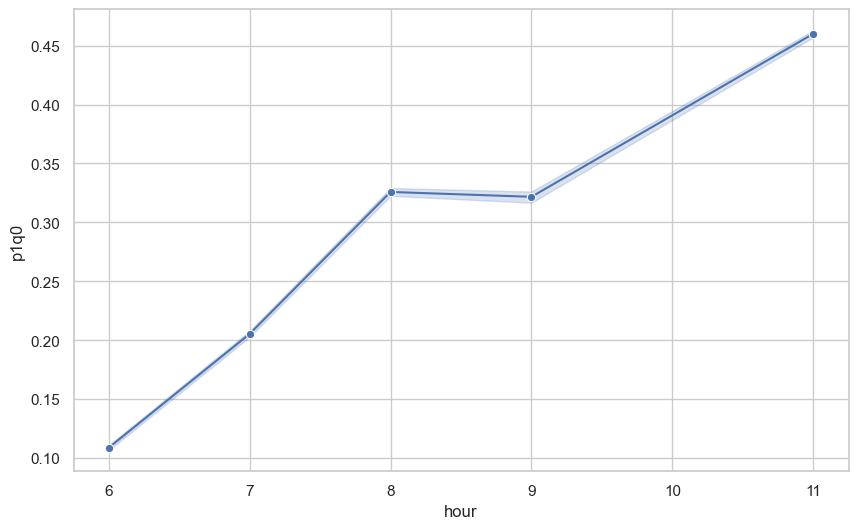

In [632]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p1q0', data=X, marker='o', color='b')

In [633]:
(X['hour'] == 11.0).sum()

2

In [634]:
X[X['hour'] == 11]

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
28760,2019-04-09,6.0,2.0,11.0,2.0,0.463,0.539,0.403,0.4154,0.5190,0.4370,0.613
29109,2019-04-09,6.0,8.0,11.0,2.0,0.457,0.401,0.532,0.6130,0.5488,0.4836,0.594


<Axes: xlabel='hour', ylabel='p2q0'>

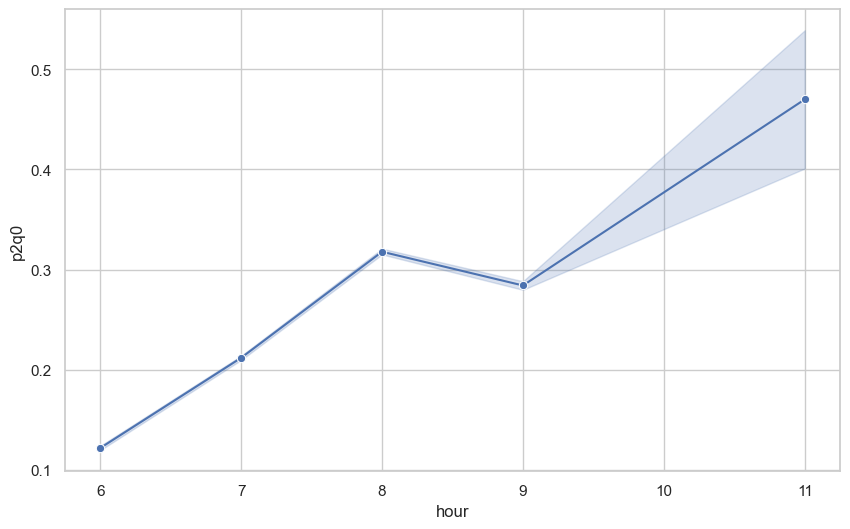

In [635]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p2q0', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p3q0'>

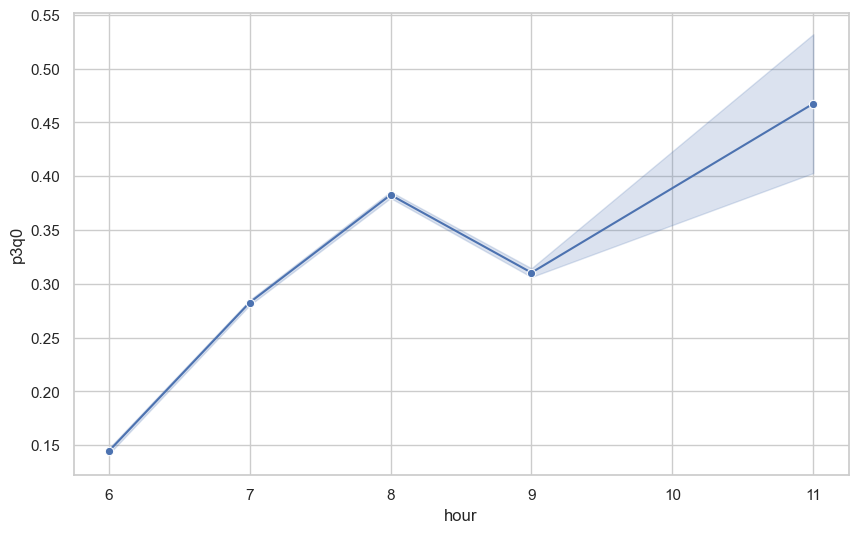

In [636]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p3q0', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p0q1'>

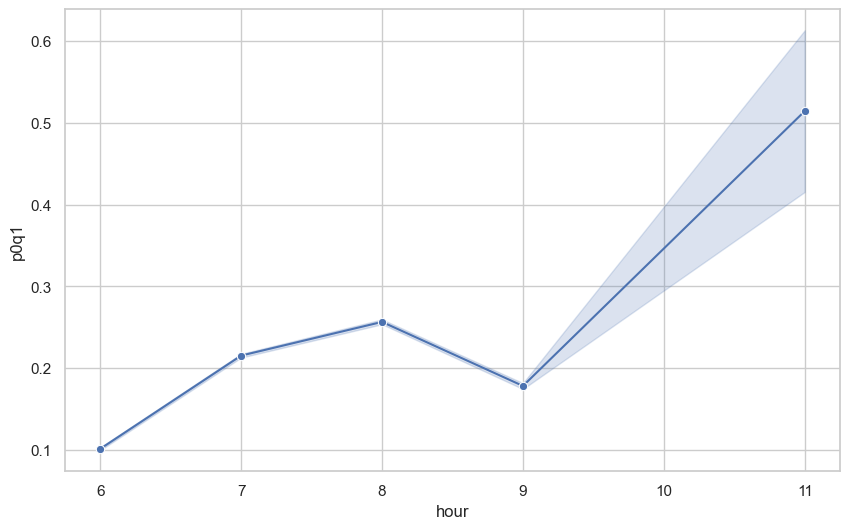

In [637]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p0q1', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p0q2'>

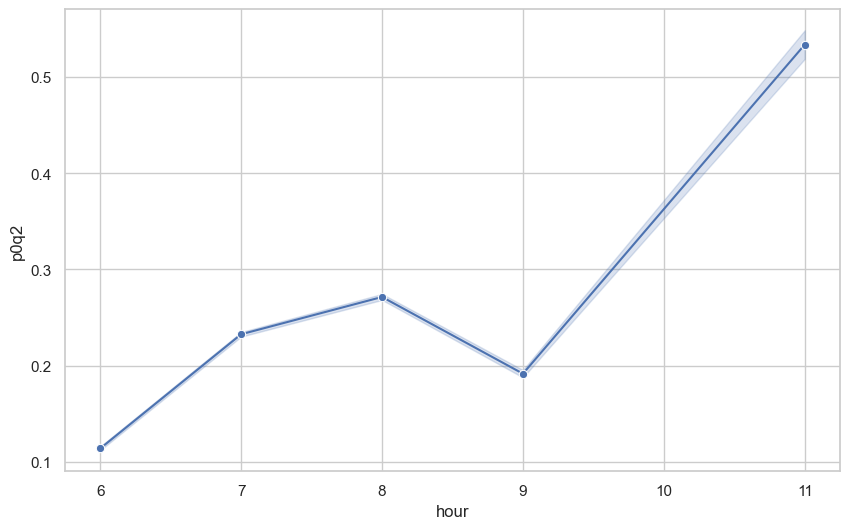

In [638]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p0q2', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p0q3'>

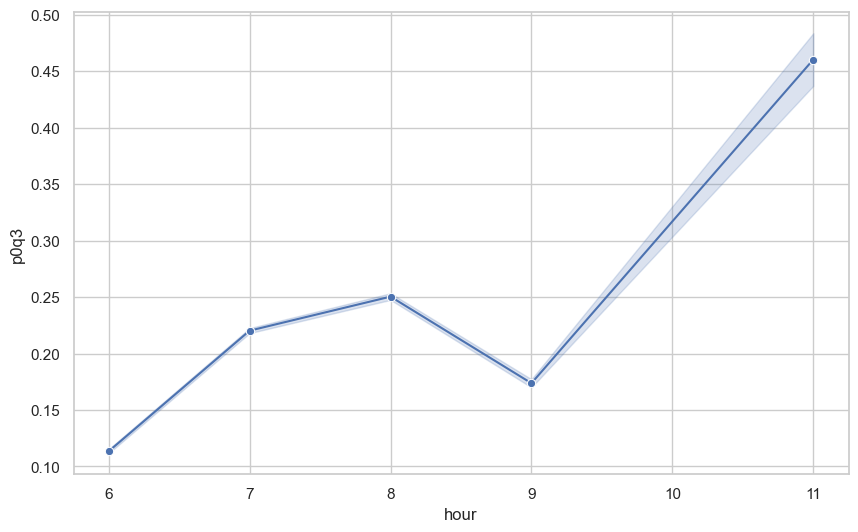

In [639]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p0q3', data=X, marker='o', color='b')

In [640]:
X

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1.0,0.0,6.0,2.0,0.127765,0.173479,0.175463,0.201,0.138,0.091000,0.216
1,2019-01-08,1.0,0.0,6.0,2.0,0.127765,0.173479,0.175463,0.204,0.152,0.106000,0.216
2,2019-01-10,1.0,0.0,6.0,2.0,0.127765,0.173479,0.175463,0.213,0.153,0.111000,0.227
3,2019-01-11,1.0,0.0,6.0,2.0,0.127765,0.173479,0.175463,0.213,0.152,0.108000,0.229
4,2019-01-14,1.0,0.0,6.0,2.0,0.127765,0.173479,0.175463,0.210,0.147,0.096000,0.225
...,...,...,...,...,...,...,...,...,...,...,...,...
31114,2019-05-13,9.0,10.0,8.0,2.0,0.152000,0.188600,0.157000,0.080,0.100,0.259469,0.111
31115,2019-05-14,9.0,10.0,8.0,2.0,0.153000,0.180400,0.191000,0.089,0.121,0.259469,0.143
31116,2019-05-15,9.0,10.0,8.0,2.0,0.166000,0.149000,0.168000,0.099,0.129,0.259469,0.139
31117,2019-03-21,9.0,10.0,8.0,2.0,0.182000,0.193000,0.162000,0.074,0.101,0.259469,0.117


In [641]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.00000
train          0.00000
station        0.00000
composition    0.00000
p1q0           0.00000
p2q0           0.00000
p3q0           0.00000
p0q1           0.00000
p0q2           0.00000
p0q3           0.00000
p0q0           0.00000
hour           0.10296
dtype: float64

In [642]:
X = X.dropna(subset=['hour'])
X.reset_index(drop=True, inplace=True)

In [643]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.0
train          0.0
station        0.0
hour           0.0
composition    0.0
p1q0           0.0
p2q0           0.0
p3q0           0.0
p0q1           0.0
p0q2           0.0
p0q3           0.0
p0q0           0.0
dtype: float64

In [644]:
X

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1.0,0.0,6.0,2.0,0.127765,0.173479,0.175463,0.201,0.138,0.091000,0.216
1,2019-01-08,1.0,0.0,6.0,2.0,0.127765,0.173479,0.175463,0.204,0.152,0.106000,0.216
2,2019-01-10,1.0,0.0,6.0,2.0,0.127765,0.173479,0.175463,0.213,0.153,0.111000,0.227
3,2019-01-11,1.0,0.0,6.0,2.0,0.127765,0.173479,0.175463,0.213,0.152,0.108000,0.229
4,2019-01-14,1.0,0.0,6.0,2.0,0.127765,0.173479,0.175463,0.210,0.147,0.096000,0.225
...,...,...,...,...,...,...,...,...,...,...,...,...
27910,2019-05-13,9.0,10.0,8.0,2.0,0.152000,0.188600,0.157000,0.080,0.100,0.259469,0.111
27911,2019-05-14,9.0,10.0,8.0,2.0,0.153000,0.180400,0.191000,0.089,0.121,0.259469,0.143
27912,2019-05-15,9.0,10.0,8.0,2.0,0.166000,0.149000,0.168000,0.099,0.129,0.259469,0.139
27913,2019-03-21,9.0,10.0,8.0,2.0,0.182000,0.193000,0.162000,0.074,0.101,0.259469,0.117


In [645]:
X = X.drop(['date'], axis=1)

In [646]:
from sklearn.model_selection import train_test_split

y = X['p0q0'] 
X = X.drop('p0q0', axis=1)  # Features (all columns except 'target')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [650]:
X_train.shape

(22332, 10)

In [648]:
y_train.shape

(22332,)

# Training the model 

In [651]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

alpha = 0.5
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [652]:
predictions = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

print(f'Coefficients du modèle : {ridge_model.coef_}')

Mean Squared Error (MSE): 0.0027050465734838928
Coefficients du modèle : [ 5.01641228e-04 -1.31128686e-04 -7.42541203e-03 -6.91553171e-02
  6.08619568e-02  7.50644745e-02  1.09991490e-01  6.99045355e-01
  8.73053733e-02  1.91321395e-01]
